In [1]:
import pandas as pd

In [2]:
df= pd.read_csv(r'C:\Users\hp\Downloads/AirPassengers.csv')
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [9]:
df.shape

(144, 2)

coding on 2 data sets


In [11]:
df.tail

<bound method NDFrame.tail of        Month  Passengers 
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]>

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   Passengers   144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [19]:
df.Month = pd.to_datetime(df.Month) # convert Month into date time

In [21]:
df= df.set_index('Month') # month Convert into index column

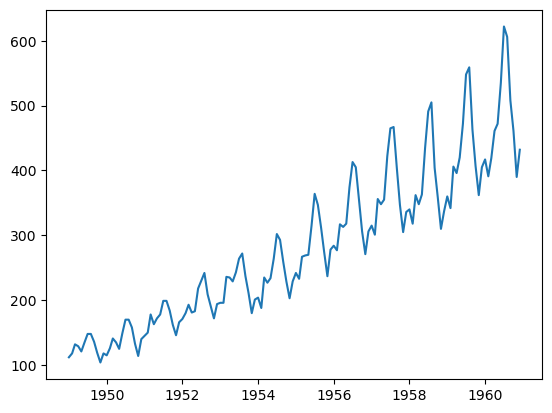

In [34]:
import matplotlib.pyplot as plt
plt.plot(df); # Seasonal uptrend


In [38]:
df.head(20)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [40]:
df.diff()

,Passengers
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


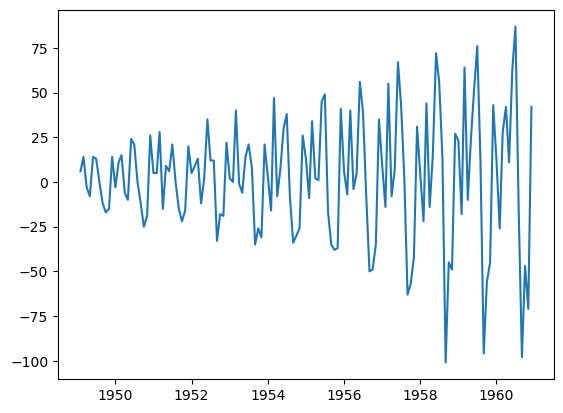

In [42]:
plt.plot(df.diff())
# Mean part has be controlled
# But variance is not same

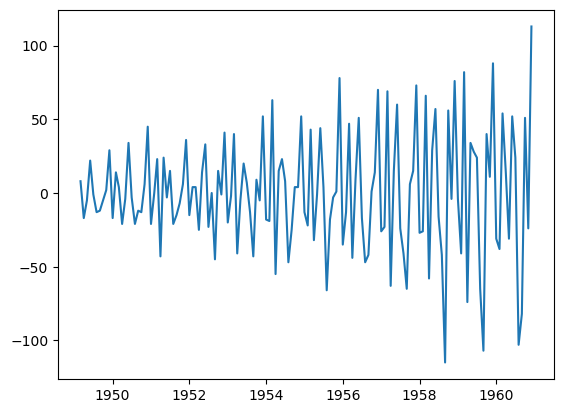

In [44]:
# 2nd level of differencing
plt.plot(df.diff().diff())

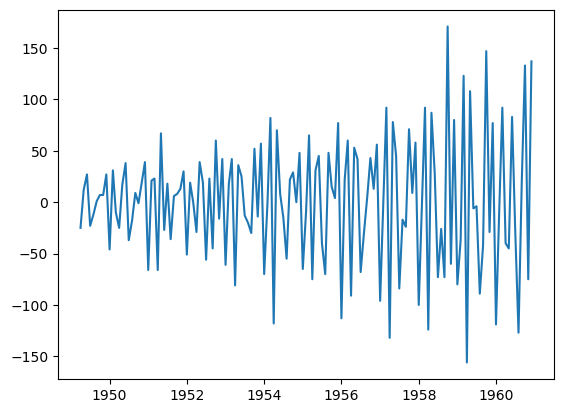

In [46]:
# 3rd level of differencing
plt.plot(df.diff().diff().diff())

In [48]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# For more understanding of data ---->not needed for model building

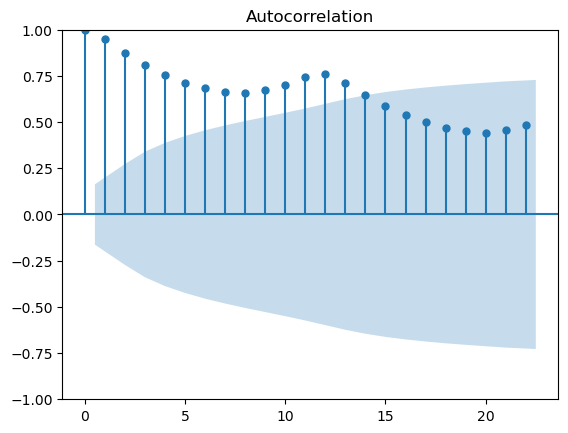

In [50]:
plot_acf(df);

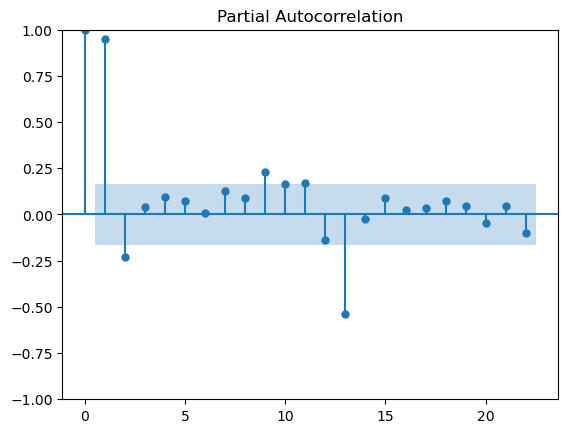

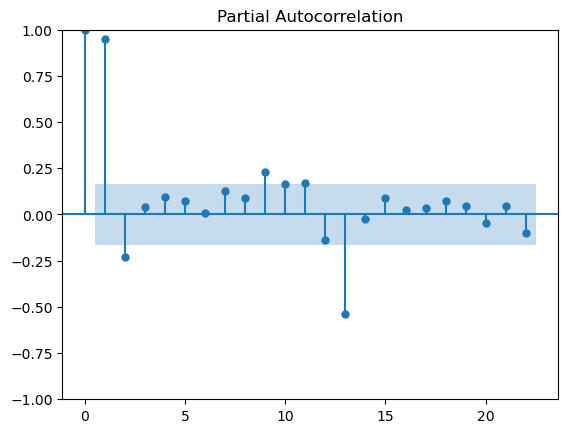

In [54]:
plot_pacf(df)

In [ ]:
# After 2 lags it becomes 0 so value of p = 2
# blue colour indicates very less correlation

In [67]:
pip install pmdarima


In [70]:
 import pmdarima

In [72]:
from pmdarima import auto_arima

In [74]:
auto_arima(df, seasonal = True,m=12)

ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [78]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [88]:
model1 = SARIMAX(df,order =(2,1,2), seasonal_order= (0,1,0,12))

In [86]:
import warnings
warnings.filterwarnings('ignore')

In [90]:
result = model1.fit()

In [96]:
pred=round(result.predict(start = 144, end= 167))
pred

1961-01-01    444.0
1961-02-01    420.0
1961-03-01    449.0
1961-04-01    492.0
1961-05-01    503.0
1961-06-01    567.0
1961-07-01    655.0
1961-08-01    639.0
1961-09-01    541.0
1961-10-01    495.0
1961-11-01    424.0
1961-12-01    466.0
1962-01-01    479.0
1962-02-01    454.0
1962-03-01    483.0
1962-04-01    526.0
1962-05-01    538.0
1962-06-01    602.0
1962-07-01    689.0
1962-08-01    674.0
1962-09-01    576.0
1962-10-01    529.0
1962-11-01    459.0
1962-12-01    501.0
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
# how to conclude that model is doing good
# consider today is 1960 and done forecast for 61 and 62

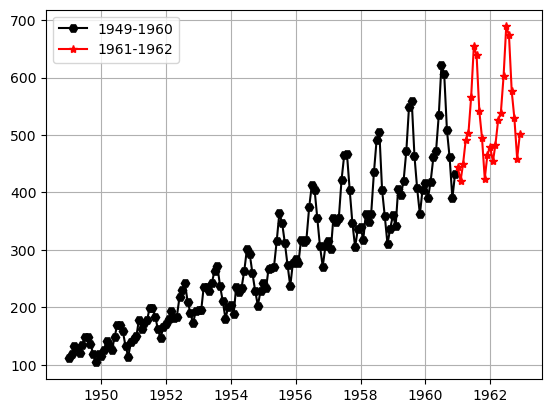

In [98]:
plt.plot(df,color='black',label= '1949-1960', marker='H')
plt.plot(pred,color='red',label= '1961-1962',marker='*')
plt.legend()
plt.grid()


In [100]:
rv=pd.read_csv(r'C:\Users\hp\Downloads/RestaurantVisitors.csv')

In [102]:
rv = rv.set_index(rv['date'])
rv.head()


,date,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,,
01-01-2016,01-01-2016,Friday,1,New Year's Day,65,25,67,139,296
01-02-2016,01-02-2016,Saturday,0,na,24,39,43,85,191
01-03-2016,01-03-2016,Sunday,0,na,24,31,66,81,202
01-04-2016,01-04-2016,Monday,0,na,23,18,32,32,105
01-05-2016,01-05-2016,Tuesday,0,na,2,15,38,43,98


In [120]:
# Sampling (sequwntial sampling)
train_rv = rv.iloc[0:450]
test_rv= rv.iloc[450:]

In [106]:
auto_arima(rv['total'],seasonal = True,m=7)

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

In [112]:
model2 = SARIMAX(rv['total'],order =(0,0,0), seasonal_order= (1,0,1,7))

In [114]:
res= model2.fit()

In [122]:
test_rv.shape

(28, 9)

In [126]:
pred_rv=round(res.predict(start=450,stop=test477))
pred_rv

date
3/26/2017     175.0
3/27/2017      91.0
3/28/2017      95.0
3/29/2017      95.0
3/30/2017      97.0
3/31/2017     146.0
04-01-2017    232.0
04-02-2017    174.0
04-03-2017     91.0
04-04-2017     95.0
04-05-2017     97.0
04-06-2017     97.0
04-07-2017    146.0
04-08-2017    230.0
04-09-2017    175.0
04-10-2017     90.0
04-11-2017     95.0
04-12-2017     97.0
4/13/2017      97.0
4/14/2017     146.0
4/15/2017     229.0
4/16/2017     175.0
4/17/2017      89.0
4/18/2017      95.0
4/19/2017      97.0
4/20/2017      95.0
4/21/2017     149.0
4/22/2017     228.0
Name: predicted_mean, dtype: float64

evaluate the model

In [ ]:
test_rv['Pred_Sarima'] = pred_rv

In [137]:
from sklearn.metrics import *

In [141]:
mean_absolute_percentage_error(test_rv['total'],pred_rv)*100

15.680380221226512

In [ ]:
# SARIMAX

In [157]:
auto_arima(train_rv['total'],order=(1,0,0),seasonal_orders=(1,0,1,7),exog= train_rv[['holiday']])

ARIMA(order=(4, 0, 4), scoring_args={}, suppress_warnings=True)

In [159]:
model1 = SARIMAX(train_rv['total'],order=(1,0,0),seasonal_order=(1,0,1,7),exog=train_rv[['holiday']])

In [163]:
res= model1.fit()

In [171]:
pred_rvx =round(res.predict(start = 450, end=477,exog = test_rv[['holiday']]))

In [173]:
test_rv['Pred_Sarimax'] = list(pred_rvx)

In [181]:
mean_squared_error(test_rv['total'], pred_rvx)

359.85714285714283

In [177]:
mean_absolute_percentage_error(test_rv['total'],pred_rvx)*100

12.14456177404138

milk,alcohol

10-11-2025

In [ ]:
# Air passenger data set

In [5]:
df.Month = pd.to_datetime(df.Month) # convert Month into date time

In [11]:
df.Month

0     1949-01-01
1     1949-02-01
2     1949-03-01
3     1949-04-01
4     1949-05-01
         ...    
139   1960-08-01
140   1960-09-01
141   1960-10-01
142   1960-11-01
143   1960-12-01
Name: Month, Length: 144, dtype: datetime64[ns]

In [ ]:
# How to check if the series is stationary 
# By stats method
# Stats test gives the ans in P-value------>CHI SQUARE TEST, ANNOVA, Z-TEST
# Gives ans in P-value If p values is less than .05

In [ ]:
# ADF --> AGUMENTED DICKEY FULLER TEST
## TEST is for stationarity
# NULL HYpothesis is that series is nt stationary 
# Ha->series is not stationary
# Ho-> series is stationary


In [13]:
from statsmodels.tsa.stattools import adfuller

In [21]:
adfuller(df['Passengers '])    #0.99 is the  P-value

(0.8153688792060597,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [17]:
df.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [34]:
adfuller(df['Passengers '].diff().dropna()) # 0.05 tells the data is broadly statinary 

(-2.829266824169992,
 0.0542132902838265,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854085)

In [36]:
adfuller(df['Passengers '].diff().diff().dropna()) 
# after 2nd level of difference p value is less than .05 so reject the Ho(series is stationary)
# Conclusion the series is ststionary

(-16.384231542468527,
 2.732891850014085e-29,
 11,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.60204172756)

In [ ]:
# Clustering --------->Kmeans
# Clustering based on the herarchy
# Uses dendograms-->shows clusters based upon distance
# lesser the distance less the records, more distance more records
# dist increase size of cluster will increase
# dist decrease size of cluster will decrease

In [38]:
mall= pd.read_csv(r"C:\Users\hp\Downloads/mall_kmeans.csv")
mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [40]:
mall = mall.drop(['CustomerID'], axis= 1)

In [42]:
mall.Genre.unique()

array(['Male', 'Female'], dtype=object)

In [50]:
mall.Genre.replace({'Male':0,'Female':1}, inplace= True)

In [52]:
mall.head(2)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81


In [54]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [56]:
mall_lin = linkage(mall, 'ward')
# ward hierch cluster-->minimises the total distance within cluster then it makes the group

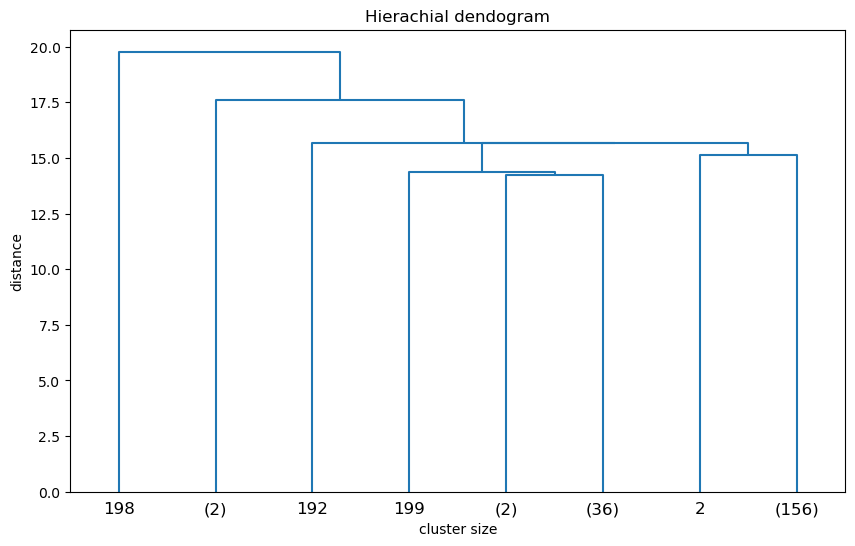

In [72]:
plt.figure(figsize=(10,6))
dendrogram(mall_lin, p =8, truncate_mode='lastp')
plt.title("Hierachial dendogram")
plt.xlabel("cluster size")
plt.ylabel("distance");

In [66]:
mall.shape

(200, 4)

In [ ]:
# Which record in which cluster

In [78]:
from sklearn.cluster import AgglomerativeClustering

In [80]:
cluster =AgglomerativeClustering(n_clusters=4)

In [86]:
cluster.fit_predict(mall) # which record is a part of which cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

In [88]:
mall['Cluster_Num'] = cluster.fit_predict(mall)

In [90]:
mall = mall.sort_values(['Cluster_Num'])

In [100]:
mall.head()


,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_Num
0,0,19,15,39,0
10,0,67,19,14,0
12,1,58,20,15,0
14,0,37,20,13,0
18,0,52,23,29,0


Text(0, 0.5, 'Spending score')

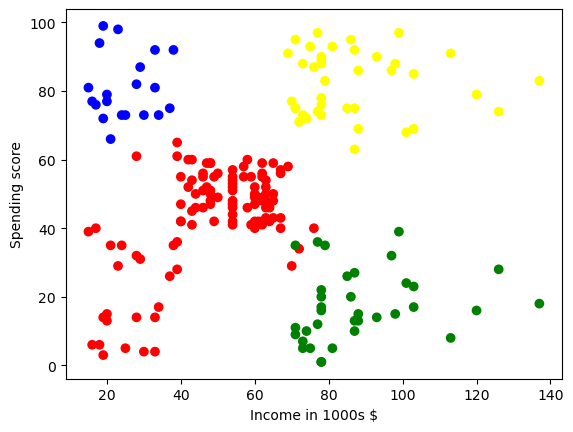

In [98]:
colormap = np.array(['red' , 'green', 'yellow' , 'blue' ])
plt.scatter(mall['Annual Income (k$)'] , mall['Spending Score (1-100)'] , c = colormap[cluster.fit_predict(mall)])
plt.xlabel('Income in 1000s $')
plt.ylabel('Spending score')


In [ ]:
#DBSCAN-->DENSITY BASED CLUSTERING WITH APPLICATION OF NOSIE
#T-sne
#